In [1]:

import pandas as pd 
from scipy.stats import loguniform 
from sklearn.linear_model import
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, RandomizedSearchCV 
from sklearn.metrics import (
    accuracy_score,  
    confusion_matrix, 
    precision_score, recall_score, f1_score, roc_auc_score, classification_report
)
import seaborn as sns  
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv(filepath_or_buffer = "/Users/ninoj/Downloads/beisbol.csv")


In [4]:
datos

,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762
5,5,New_S.,5600,718
6,6,New_Y.,5518,867
7,7,Milwaukee,5447,721
8,8,Colorado,5544,735
9,9,Houston,5598,615


In [5]:
# Eliminar columnas innecesarias si existen
datos = datos.drop(columns=["Unnamed: 0"], errors='ignore')  # Quitar columna de índice si está presente


In [6]:
datos

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787
3,Kansas,5672,730
4,St.,5532,762
5,New_S.,5600,718
6,New_Y.,5518,867
7,Milwaukee,5447,721
8,Colorado,5544,735
9,Houston,5598,615


In [7]:
# Crear una variable objetivo binaria basada en la mediana de "runs"
threshold = datos['runs'].median()  # Calcular la mediana de las carreras ("runs")
datos['high_runs'] = (datos['runs'] > threshold).astype(int)  # Crear una nueva columna: 1 si supera la mediana, 0 si no

In [8]:
# Dividir los datos en características (X) y etiquetas (y)
X = datos[['bateos']].values
y = datos['high_runs'].values

In [9]:
# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# Crear un modelo básico de regresión logística
modelo = LogisticRegression()

In [11]:
# Entrenar el modelo básico con los datos de entrenamiento
modelo.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Realizar predicciones con el modelo básico
predicciones = modelo.predict(X_test)

In [14]:
# Calcular métricas de evaluación para el modelo básico
print("Exactitud del modelo básico:", accuracy_score(y_test, predicciones))
print("Matriz de confusión:\n", confusion_matrix(y_test, predicciones))
print("Reporte de clasificación:\n", classification_report(y_test, predicciones))


Exactitud del modelo básico: 0.6666666666666666
Matriz de confusión:
 [[3 0]
 [2 1]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.33      0.50         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6



In [15]:
# Configurar la búsqueda de hiperparámetros
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)  # Validación cruzada estratificada repetida


In [16]:
# Definir el espacio de hiperparámetros para la búsqueda
espacio = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
    'penalty': ['none', 'l1', 'l2', 'elasticnet'], 
    'fit_intercept': [True, False], 
    'C': loguniform(1e-5, 100), 
    'tol': loguniform(1e-5, 1), 
    'warm_start': [True, False] 
}

In [17]:
# Configurar la búsqueda aleatoria con validación cruzada
search = RandomizedSearchCV(
    modelo,
    espacio, 
    n_iter=500, 
    scoring='accuracy',
    n_jobs=-1,
    cv=cv,
    random_state=1 
)

In [18]:
# Ejecutar la búsqueda de hiperparámetros
resultado = search.fit(X_train, y_train)

C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
9600 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1139 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_const

In [19]:
# Mostrar los mejores hiperparámetros y la mejor puntuación obtenida
print('Mejor exactitud:', resultado.best_score_)
print('Mejores hiperparámetros:', resultado.best_params_)

Mejor exactitud: 0.7777777777777778
Mejores hiperparámetros: {'C': np.float64(0.2089365384870542), 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': np.float64(1.1092769399323461e-05), 'warm_start': False}


In [20]:
# Optimizar el modelo con los mejores hiperparámetros obtenidos
mejor_modelo = LogisticRegression(
    **resultado.best_params_ 
)
mejor_modelo.fit(X_train, y_train)  # Entrenar el modelo optimizado

C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\scipy\optimize\_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\sklearn\utils\optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


LogisticRegression(C=np.float64(0.2089365384870542), solver='newton-cg',
                   tol=np.float64(1.1092769399323461e-05))

In [21]:
# Evaluar el modelo optimizado con el conjunto de prueba
predicciones_optimizadas = mejor_modelo.predict(X_test)
print("Exactitud del modelo optimizado:", accuracy_score(y_test, predicciones_optimizadas))
print("Matriz de confusión:\n", confusion_matrix(y_test, predicciones_optimizadas))
print("Reporte de clasificación:\n", classification_report(y_test, predicciones_optimizadas))


Exactitud del modelo optimizado: 0.6666666666666666
Matriz de confusión:
 [[3 0]
 [2 1]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.33      0.50         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6



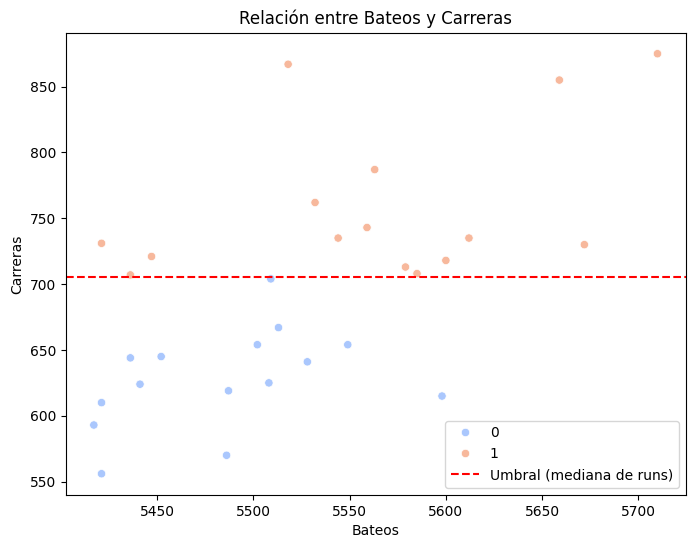

In [22]:

# Gráfica personalizada de la relación entre bateos y carreras
plt.figure(figsize=(8, 6))
sns.scatterplot(x=datos['bateos'], y=datos['runs'], hue=datos['high_runs'], palette="coolwarm")  # Gráfica de dispersión
plt.axhline(threshold, color='red', linestyle='--', label='Umbral (mediana de runs)')  # Línea del umbral
plt.title("Relación entre Bateos y Carreras")
plt.xlabel("Bateos")
plt.ylabel("Carreras")
plt.legend()
plt.show()